1. Importing necessary libraries and packages as well as the dataframe

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

2. Checking the dataframe created from the Data Wrangling Phase

In [2]:
df = pd.read_csv("stocks.csv")

In [3]:
df

,Unnamed: 0,Unnamed: 1,Date,Close,Volume,Open,High,Low,Stock
0,Apple,1257,2019-07-22,51.8050,89111720,50.9125,51.8075,50.9025,Apple
1,Apple,1256,2019-07-23,52.2100,73420840,52.1150,52.2275,51.8225,Apple
2,Apple,1255,2019-07-24,52.1675,59966280,51.9175,52.2875,51.7925,Apple
3,Apple,1254,2019-07-25,51.7550,55638240,52.2225,52.3100,51.6825,Apple
4,Apple,1253,2019-07-26,51.9350,70475480,51.8700,52.4325,51.7850,Apple
...,...,...,...,...,...,...,...,...,...
6285,Netflix,4,2024-07-15,656.4500,3208763,647.5000,667.5400,646.6300,Netflix
6286,Netflix,3,2024-07-16,656.3200,2685706,661.8000,663.6750,649.1300,Netflix
6287,Netflix,2,2024-07-17,647.4600,4017277,650.0000,650.4500,639.4700,Netflix
6288,Netflix,1,2024-07-18,643.0400,7575763,656.6000,657.0395,639.1650,Netflix


In [4]:
df.dtypes

Unnamed: 0     object
Unnamed: 1      int64
Date           object
Close         float64
Volume          int64
Open          float64
High          float64
Low           float64
Stock          object
dtype: object

3. Convert each feature to the proper type and add more features based on original

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

In [6]:
df = df.drop(['Unnamed: 0', 'Unnamed: 1'], axis = 1)
df.head()

,Date,Close,Volume,Open,High,Low,Stock
0,2019-07-22,51.8050,89111720,50.9125,51.8075,50.9025,Apple
1,2019-07-23,52.2100,73420840,52.1150,52.2275,51.8225,Apple
2,2019-07-24,52.1675,59966280,51.9175,52.2875,51.7925,Apple
3,2019-07-25,51.7550,55638240,52.2225,52.3100,51.6825,Apple
4,2019-07-26,51.9350,70475480,51.8700,52.4325,51.7850,Apple


2. Adding important features based on other features

In [7]:
df['200_Day_Average'] = df['Close'].rolling(200).mean()
df['200_Day_Average'].dropna(inplace = True) 

In [8]:
df['50_Day_Average'] = df['Close'].rolling(50).mean()
df['50_Day_Average'].dropna(inplace = True) 

In [9]:
df['200_to_50_MA_Ratio'] = df['50_Day_Average']/df['200_Day_Average']

In [10]:
volatility = pd.read_csv("VIX_History.csv")
WTI = pd.read_csv("WTI.csv")
DXY = pd.read_csv('DXY.csv')

In [11]:
volatility

,DATE,OPEN,HIGH,LOW,CLOSE
0,01/02/1990,17.24,17.24,17.24,17.24
1,01/03/1990,18.19,18.19,18.19,18.19
2,01/04/1990,19.22,19.22,19.22,19.22
3,01/05/1990,20.11,20.11,20.11,20.11
4,01/08/1990,20.26,20.26,20.26,20.26
...,...,...,...,...,...
8717,07/23/2024,15.21,15.35,13.90,14.72
8718,07/24/2024,15.35,18.46,15.18,18.04
8719,07/25/2024,18.41,19.36,16.42,18.46
8720,07/26/2024,17.97,18.05,16.37,16.39


In [12]:
volatility = volatility.rename(columns = {'DATE':'Date', 'OPEN':'Open', 'HIGH':'High', 'LOW':'Low', 'CLOSE':'Close'})

In [13]:
volatility.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [14]:
volatility['Date'] = volatility['Date'].str.replace('/', '-')
volatility.head()

,Date,Open,High,Low,Close
0,01-02-1990,17.24,17.24,17.24,17.24
1,01-03-1990,18.19,18.19,18.19,18.19
2,01-04-1990,19.22,19.22,19.22,19.22
3,01-05-1990,20.11,20.11,20.11,20.11
4,01-08-1990,20.26,20.26,20.26,20.26


In [15]:
volatility['Date'] = pd.to_datetime(volatility['Date'], format = '%m-%d-%Y')
volatility.head()

,Date,Open,High,Low,Close
0,1990-01-02,17.24,17.24,17.24,17.24
1,1990-01-03,18.19,18.19,18.19,18.19
2,1990-01-04,19.22,19.22,19.22,19.22
3,1990-01-05,20.11,20.11,20.11,20.11
4,1990-01-08,20.26,20.26,20.26,20.26


In [16]:
volatility.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

In [17]:
volatility.head()

,Date,Open,High,Low,Close
0,1990-01-02,17.24,17.24,17.24,17.24
1,1990-01-03,18.19,18.19,18.19,18.19
2,1990-01-04,19.22,19.22,19.22,19.22
3,1990-01-05,20.11,20.11,20.11,20.11
4,1990-01-08,20.26,20.26,20.26,20.26


In [18]:
volatility = volatility.loc[(volatility['Date'] >= '2019-07-22') & (volatility['Date'] <= '2024-07-19')]

In [19]:
volatility = volatility.rename(columns = {'High':'Vola_High', 'Low':'Vola_Low'})

In [20]:
volatility

,Date,Open,Vola_High,Vola_Low,Close
7441,2019-07-22,14.55,14.70,13.42,13.53
7442,2019-07-23,13.42,13.52,12.55,12.61
7443,2019-07-24,12.80,13.10,11.98,12.07
7444,2019-07-25,12.24,13.54,11.69,12.74
7445,2019-07-26,12.58,12.72,12.01,12.16
...,...,...,...,...,...
8711,2024-07-15,12.78,13.26,12.75,13.12
8712,2024-07-16,13.38,13.47,12.95,13.19
8713,2024-07-17,13.60,14.88,13.54,14.48
8714,2024-07-18,14.27,16.43,14.08,15.93


In [21]:
volatility.dtypes

Date         datetime64[ns]
Open                float64
Vola_High           float64
Vola_Low            float64
Close               float64
dtype: object

In [22]:
df = pd.merge(df, volatility[['Date', 'Vola_High', 'Vola_Low']], how = 'left', on = 'Date')
df.head()

,Date,Close,Volume,Open,High,Low,Stock,200_Day_Average,50_Day_Average,200_to_50_MA_Ratio,Vola_High,Vola_Low
0,2019-07-22,51.8050,89111720,50.9125,51.8075,50.9025,Apple,NaN,NaN,NaN,14.70,13.42
1,2019-07-23,52.2100,73420840,52.1150,52.2275,51.8225,Apple,NaN,NaN,NaN,13.52,12.55
2,2019-07-24,52.1675,59966280,51.9175,52.2875,51.7925,Apple,NaN,NaN,NaN,13.10,11.98
3,2019-07-25,51.7550,55638240,52.2225,52.3100,51.6825,Apple,NaN,NaN,NaN,13.54,11.69
4,2019-07-26,51.9350,70475480,51.8700,52.4325,51.7850,Apple,NaN,NaN,NaN,12.72,12.01


In [23]:
df

,Date,Close,Volume,Open,High,Low,Stock,200_Day_Average,50_Day_Average,200_to_50_MA_Ratio,Vola_High,Vola_Low
0,2019-07-22,51.8050,89111720,50.9125,51.8075,50.9025,Apple,NaN,NaN,NaN,14.70,13.42
1,2019-07-23,52.2100,73420840,52.1150,52.2275,51.8225,Apple,NaN,NaN,NaN,13.52,12.55
2,2019-07-24,52.1675,59966280,51.9175,52.2875,51.7925,Apple,NaN,NaN,NaN,13.10,11.98
3,2019-07-25,51.7550,55638240,52.2225,52.3100,51.6825,Apple,NaN,NaN,NaN,13.54,11.69
4,2019-07-26,51.9350,70475480,51.8700,52.4325,51.7850,Apple,NaN,NaN,NaN,12.72,12.01
...,...,...,...,...,...,...,...,...,...,...,...,...
6285,2024-07-15,656.4500,3208763,647.5000,667.5400,646.6300,Netflix,545.52710,647.4238,1.186786,13.26,12.75
6286,2024-07-16,656.3200,2685706,661.8000,663.6750,649.1300,Netflix,546.92075,649.2472,1.187096,13.47,12.95
6287,2024-07-17,647.4600,4017277,650.0000,650.4500,639.4700,Netflix,548.27625,650.6096,1.186646,14.88,13.54
6288,2024-07-18,643.0400,7575763,656.6000,657.0395,639.1650,Netflix,549.60345,651.5310,1.185457,16.43,14.08


In [24]:
WTI

,Date,Price,Open,High,Low,Vol.,Change %
0,07/19/2024,80.13,82.47,82.88,80.07,83.80K,-3.25%
1,07/18/2024,82.82,83.11,83.82,82.04,95.70K,-0.04%
2,07/17/2024,82.85,80.85,83.10,80.45,257.44K,2.59%
3,07/16/2024,80.76,81.92,81.93,80.22,308.19K,-1.40%
4,07/15/2024,81.91,82.16,82.58,81.47,296.52K,-0.36%
...,...,...,...,...,...,...,...
1335,06/28/2019,58.47,59.22,59.80,57.75,556.10K,-1.62%
1336,06/27/2019,59.43,59.27,59.73,58.61,531.41K,0.08%
1337,06/26/2019,59.38,58.84,59.93,58.65,686.82K,2.68%
1338,06/25/2019,57.83,57.74,58.84,57.20,673.14K,-0.12%


In [25]:
WTI.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

In [26]:
WTI = WTI.rename(columns = {'Price':'WTI_Price'})
WTI['Date'] = WTI['Date'].str.replace('/', '-')
WTI['Date'] = pd.to_datetime(WTI['Date'], format = '%m-%d-%Y')
WTI = WTI.sort_values('Date')
WTI.head()

,Date,WTI_Price,Open,High,Low,Vol.,Change %
1339,2019-06-24,57.90,57.72,58.22,56.75,597.16K,0.82%
1338,2019-06-25,57.83,57.74,58.84,57.20,673.14K,-0.12%
1337,2019-06-26,59.38,58.84,59.93,58.65,686.82K,2.68%
1336,2019-06-27,59.43,59.27,59.73,58.61,531.41K,0.08%
1335,2019-06-28,58.47,59.22,59.80,57.75,556.10K,-1.62%


In [27]:
df = pd.merge(df, WTI[['Date', 'WTI_Price']], how = 'left', on = 'Date')
df.head()

,Date,Close,Volume,Open,High,Low,Stock,200_Day_Average,50_Day_Average,200_to_50_MA_Ratio,Vola_High,Vola_Low,WTI_Price
0,2019-07-22,51.8050,89111720,50.9125,51.8075,50.9025,Apple,NaN,NaN,NaN,14.70,13.42,56.22
1,2019-07-23,52.2100,73420840,52.1150,52.2275,51.8225,Apple,NaN,NaN,NaN,13.52,12.55,56.77
2,2019-07-24,52.1675,59966280,51.9175,52.2875,51.7925,Apple,NaN,NaN,NaN,13.10,11.98,55.88
3,2019-07-25,51.7550,55638240,52.2225,52.3100,51.6825,Apple,NaN,NaN,NaN,13.54,11.69,56.02
4,2019-07-26,51.9350,70475480,51.8700,52.4325,51.7850,Apple,NaN,NaN,NaN,12.72,12.01,56.20


In [28]:
DXY

,Date,Price,Open,High,Low,Vol.,Change %
0,07/19/2024,104.40,104.16,104.42,104.13,NaN,0.21%
1,07/18/2024,104.17,103.70,104.23,103.65,NaN,0.41%
2,07/17/2024,103.75,104.22,104.29,103.65,NaN,-0.50%
3,07/16/2024,104.27,104.25,104.51,104.20,NaN,0.08%
4,07/15/2024,104.19,104.08,104.32,104.03,NaN,0.09%
...,...,...,...,...,...,...,...
1299,07/26/2019,98.01,97.79,98.09,97.76,NaN,0.19%
1300,07/25/2019,97.82,97.69,97.92,97.50,NaN,0.09%
1301,07/24/2019,97.73,97.72,97.81,97.55,NaN,0.03%
1302,07/23/2019,97.70,97.30,97.74,97.30,NaN,0.45%


In [29]:
DXY.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.        float64
Change %     object
dtype: object

In [30]:
DXY = DXY.rename(columns = {'Price':'DXY_Price'})
DXY['Date'] = DXY['Date'].str.replace('/', '-')
DXY['Date'] = pd.to_datetime(DXY['Date'], format = '%m-%d-%Y')
DXY = DXY.sort_values('Date')
DXY.head()

,Date,DXY_Price,Open,High,Low,Vol.,Change %
1303,2019-07-22,97.26,97.14,97.30,97.13,NaN,0.11%
1302,2019-07-23,97.70,97.30,97.74,97.30,NaN,0.45%
1301,2019-07-24,97.73,97.72,97.81,97.55,NaN,0.03%
1300,2019-07-25,97.82,97.69,97.92,97.50,NaN,0.09%
1299,2019-07-26,98.01,97.79,98.09,97.76,NaN,0.19%


In [31]:
df = pd.merge(df, DXY[['Date', 'DXY_Price']], how = 'left', on = 'Date')
df.head()

,Date,Close,Volume,Open,High,Low,Stock,200_Day_Average,50_Day_Average,200_to_50_MA_Ratio,Vola_High,Vola_Low,WTI_Price,DXY_Price
0,2019-07-22,51.8050,89111720,50.9125,51.8075,50.9025,Apple,NaN,NaN,NaN,14.70,13.42,56.22,97.26
1,2019-07-23,52.2100,73420840,52.1150,52.2275,51.8225,Apple,NaN,NaN,NaN,13.52,12.55,56.77,97.70
2,2019-07-24,52.1675,59966280,51.9175,52.2875,51.7925,Apple,NaN,NaN,NaN,13.10,11.98,55.88,97.73
3,2019-07-25,51.7550,55638240,52.2225,52.3100,51.6825,Apple,NaN,NaN,NaN,13.54,11.69,56.02,97.82
4,2019-07-26,51.9350,70475480,51.8700,52.4325,51.7850,Apple,NaN,NaN,NaN,12.72,12.01,56.20,98.01


In [32]:
df.set_index('Date', inplace = True)

In [33]:
df.head()

,Close,Volume,Open,High,Low,Stock,200_Day_Average,50_Day_Average,200_to_50_MA_Ratio,Vola_High,Vola_Low,WTI_Price,DXY_Price
Date,,,,,,,,,,,,,
2019-07-22,51.8050,89111720,50.9125,51.8075,50.9025,Apple,NaN,NaN,NaN,14.70,13.42,56.22,97.26
2019-07-23,52.2100,73420840,52.1150,52.2275,51.8225,Apple,NaN,NaN,NaN,13.52,12.55,56.77,97.70
2019-07-24,52.1675,59966280,51.9175,52.2875,51.7925,Apple,NaN,NaN,NaN,13.10,11.98,55.88,97.73
2019-07-25,51.7550,55638240,52.2225,52.3100,51.6825,Apple,NaN,NaN,NaN,13.54,11.69,56.02,97.82
2019-07-26,51.9350,70475480,51.8700,52.4325,51.7850,Apple,NaN,NaN,NaN,12.72,12.01,56.20,98.01


In [36]:
df.dropna(inplace = True)

In [37]:
df

,Close,Volume,Open,High,Low,Stock,200_Day_Average,50_Day_Average,200_to_50_MA_Ratio,Vola_High,Vola_Low,WTI_Price,DXY_Price
Date,,,,,,,,,,,,,
2020-05-05,74.3900,147751200,73.765,75.2500,73.6150,Apple,64.808807,67.50640,1.041624,36.22,31.95,24.56,99.71
2020-05-06,75.1575,142333760,75.115,75.8100,74.7175,Apple,64.925569,67.56915,1.040717,35.69,31.68,23.99,100.09
2020-05-07,75.9350,115215040,75.805,76.2925,75.4925,Apple,65.044194,67.62460,1.039672,32.28,30.37,23.55,99.89
2020-05-08,77.5325,134047960,76.410,77.5875,76.0725,Apple,65.171019,67.80765,1.040457,30.39,27.89,24.74,99.73
2020-05-11,78.7525,145946240,77.025,79.2625,76.8100,Apple,65.306007,68.01590,1.041495,31.46,26.97,24.14,100.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-15,656.4500,3208763,647.500,667.5400,646.6300,Netflix,545.527100,647.42380,1.186786,13.26,12.75,81.91,104.19
2024-07-16,656.3200,2685706,661.800,663.6750,649.1300,Netflix,546.920750,649.24720,1.187096,13.47,12.95,80.76,104.27
2024-07-17,647.4600,4017277,650.000,650.4500,639.4700,Netflix,548.276250,650.60960,1.186646,14.88,13.54,82.85,103.75


4. Visualize the features of each stock

In [38]:
apple = df[df['Stock'] == 'Apple']
amazon = df[df['Stock'] == 'Amazon']
meta = df[df['Stock'] == 'Meta']
microsoft = df[df['Stock'] == 'Microsoft']
netflix = df[df['Stock'] == 'Netflix']

In [61]:
apple

,Close,Volume,Open,High,Low,Stock,200_Day_Average,50_Day_Average,200_to_50_MA_Ratio,Vola_High,Vola_Low,WTI_Price,DXY_Price
Date,,,,,,,,,,,,,
2020-05-05,74.3900,147751200,73.765,75.2500,73.6150,Apple,64.808807,67.50640,1.041624,36.22,31.95,24.56,99.71
2020-05-06,75.1575,142333760,75.115,75.8100,74.7175,Apple,64.925569,67.56915,1.040717,35.69,31.68,23.99,100.09
2020-05-07,75.9350,115215040,75.805,76.2925,75.4925,Apple,65.044194,67.62460,1.039672,32.28,30.37,23.55,99.89
2020-05-08,77.5325,134047960,76.410,77.5875,76.0725,Apple,65.171019,67.80765,1.040457,30.39,27.89,24.74,99.73
2020-05-11,78.7525,145946240,77.025,79.2625,76.8100,Apple,65.306007,68.01590,1.041495,31.46,26.97,24.14,100.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-15,234.4000,62631250,236.480,237.2300,233.0900,Apple,186.259100,202.29780,1.086110,13.26,12.75,81.91,104.19
2024-07-16,234.8200,43234280,235.000,236.2700,232.3300,Apple,186.581050,203.53360,1.090859,13.47,12.95,80.76,104.27
2024-07-17,228.8800,57345880,229.450,231.4599,226.6400,Apple,186.872000,204.44360,1.094030,14.88,13.54,82.85,103.75


In [39]:
companies = [apple, amazon, meta, microsoft, netflix]

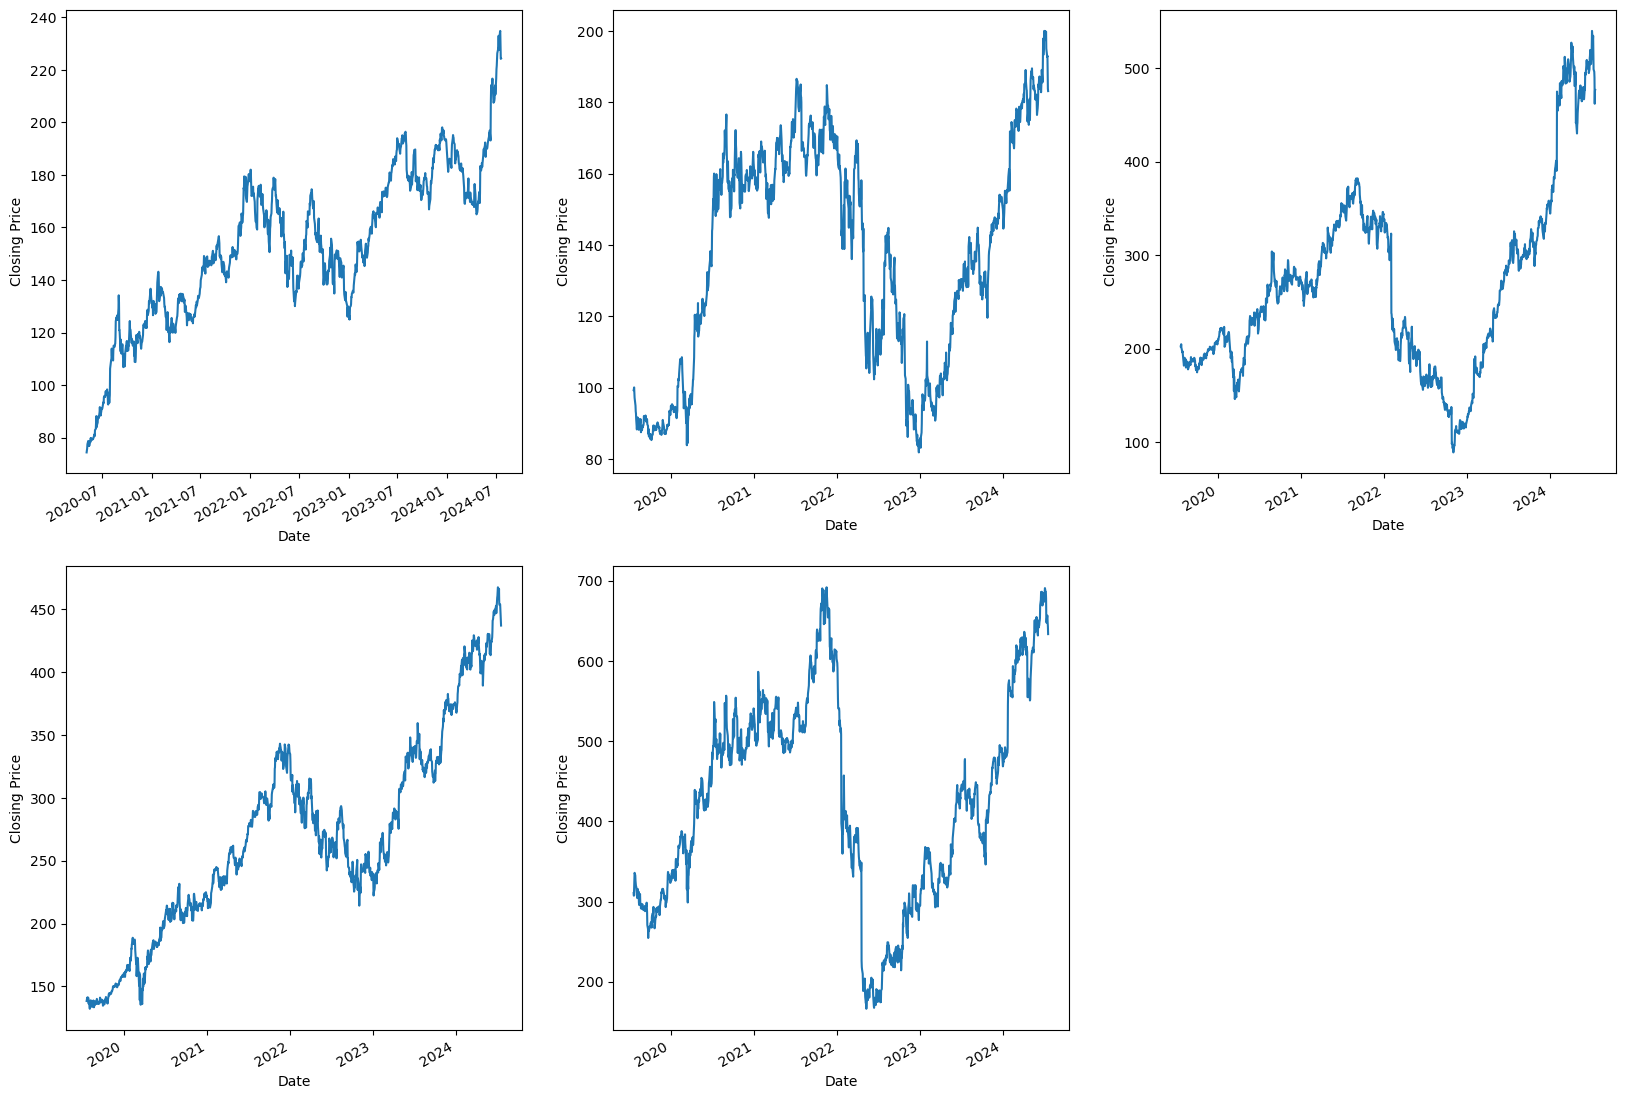

In [63]:
plt.figure(figsize=(20, 15))

for i, company in enumerate(companies, 1):
    plt.subplot(2, 3, i)
    company['Close'].plot()
    plt.ylabel('Closing Price')

Text(0.5, 1.0, 'Netflix')

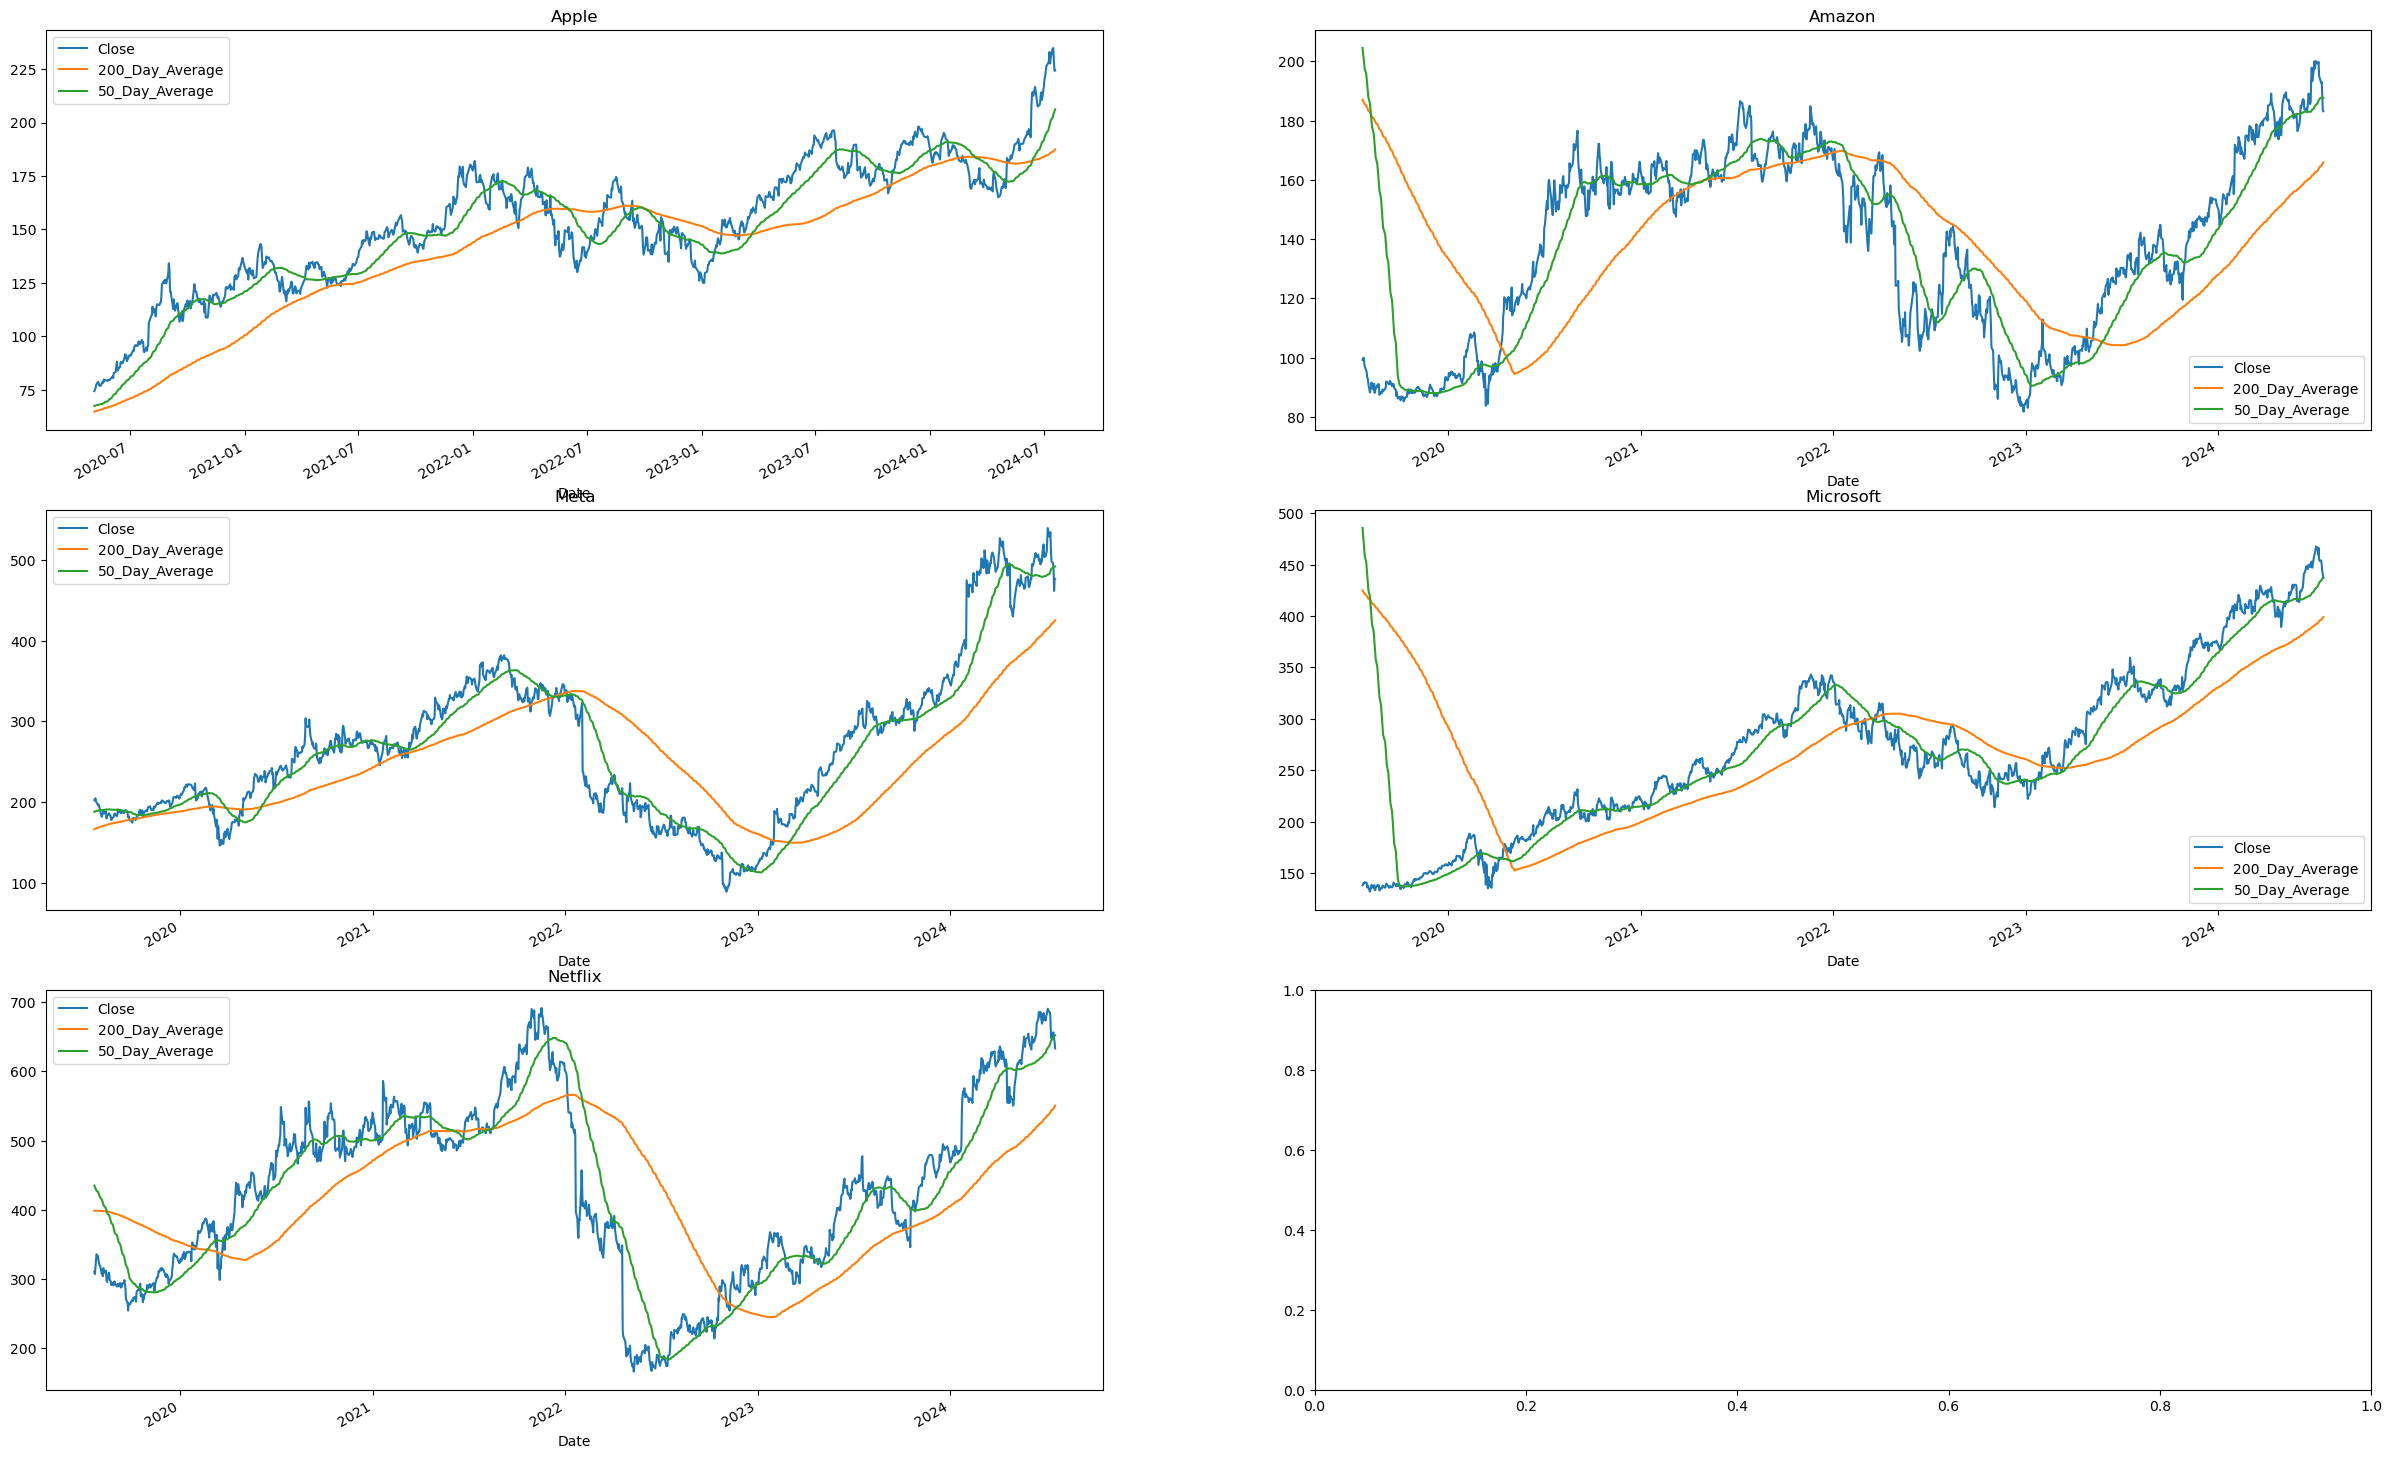

In [69]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize = (30, 20))

apple[['Close', '200_Day_Average', '50_Day_Average']].plot(ax=axes[0,0])
axes[0,0].set_title('Apple')

amazon[['Close', '200_Day_Average', '50_Day_Average']].plot(ax=axes[0,1])
axes[0,1].set_title('Amazon')

meta[['Close', '200_Day_Average', '50_Day_Average']].plot(ax=axes[1,0])
axes[1,0].set_title('Meta')

microsoft[['Close', '200_Day_Average', '50_Day_Average']].plot(ax=axes[1,1])
axes[1,1].set_title('Microsoft')

netflix[['Close', '200_Day_Average', '50_Day_Average']].plot(ax=axes[2,0])
axes[2,0].set_title('Netflix')

5. Apply PCA for the optimal number of features to use for feature engineering

In [83]:
apple_scaled = apple.drop(['Stock'], axis = 1)
apple_columns = apple_scaled.columns
apple_scaled = scale(apple_scaled)
amazon_scaled = amazon.drop(['Stock'], axis = 1)
amazon_columns = amazon_scaled.columns
amazon_scaled = scale(amazon_scaled)
meta_scaled = meta.drop(['Stock'], axis = 1)
meta_columns = meta_scaled.columns
meta_scaled = scale(meta_scaled)
microsoft_scaled = microsoft.drop(['Stock'], axis = 1)
microsoft_columns = microsoft_scaled.columns
microsoft_scaled = scale(microsoft_scaled)
netflix_scaled = netflix.drop(['Stock'], axis = 1)
netflix_columns = netflix_scaled.columns
netflix_scaled = scale(netflix_scaled)

In [85]:
apple_scaled_df = pd.DataFrame(apple_scaled, columns = apple_columns)
amazon_scaled_df = pd.DataFrame(amazon_scaled, columns = amazon_columns)
meta_scaled_df = pd.DataFrame(meta_scaled, columns = meta_columns)
microsoft_scaled_df = pd.DataFrame(microsoft_scaled, columns = microsoft_columns)
netflix_scaled_df = pd.DataFrame(netflix_scaled, columns = netflix_columns)

In [86]:
apple_scaled_df.mean()

Close                 1.610295e-16
Volume                5.367651e-17
Open                  1.610295e-16
High                  9.125006e-16
Low                  -7.514711e-16
200_Day_Average       4.830885e-16
50_Day_Average        5.367651e-17
200_to_50_MA_Ratio   -4.830885e-16
Vola_High            -2.683825e-16
Vola_Low              2.683825e-16
WTI_Price            -2.415443e-16
DXY_Price            -1.073530e-16
dtype: float64

In [87]:
apple_scaled_df.std()

Close                 1.000472
Volume                1.000472
Open                  1.000472
High                  1.000472
Low                   1.000472
200_Day_Average       1.000472
50_Day_Average        1.000472
200_to_50_MA_Ratio    1.000472
Vola_High             1.000472
Vola_Low              1.000472
WTI_Price             1.000472
DXY_Price             1.000472
dtype: float64

In [89]:
apple_pca = PCA().fit(apple_scaled)

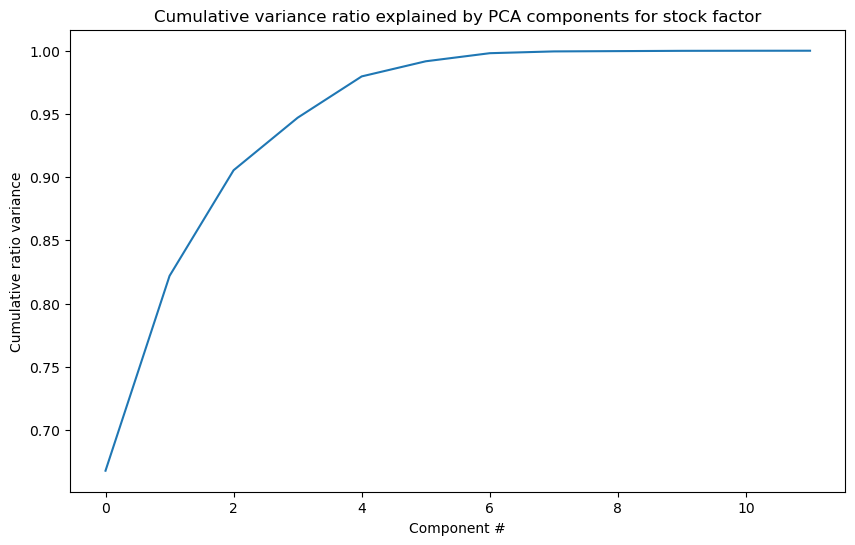

In [90]:
plt.subplots(figsize=(10, 6))
plt.plot(apple_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for stock factor');

Based on the PCA graph, it seems most effective to utilize 4 or 5 features during the feature engineering part.